# 🧑‍🏫 Class Exercise: Real-World Data Workflow in Python
In this exercise, you will:
- Collect and load a real-world dataset.
- Explore and assess the data.
- Clean and validate the dataset.
- Handle missing values, duplicates, and outliers.
- Generate descriptive statistics.
- Create meaningful visualizations.


## Step 1: Data Collection
We will use the **NYC Airbnb Open Data** (2019 snapshot). This dataset contains information about Airbnb listings in New York City.

👉 Dataset URL: [AB_NYC_2019.csv](https://raw.githubusercontent.com/datasciencedojo/datasets/master/AB_NYC_2019.csv)


In [4]:

import pandas as pd

# Download dataset
url ="https://raw.githubusercontent.com/pjournal/boun01g-data-mine-r-s/gh-pages/Assignment/AB_NYC_2019.csv"
df = pd.read_csv(url)

print("Data loaded successfully!")
print("Shape:", df.shape)
df.head()


Data loaded successfully!
Shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Step 2: Initial Exploration (EDA - Part 1)
Let's start by examining the dataset structure, datatypes, and missing values.

In [5]:

# Dataset info
df.info()

# Summary of missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [6]:

# Check numerical stats
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:

# Check categorical stats
df.describe(include="object")


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


## Step 3: Data Cleaning
Here we will:
- Handle missing values.
- Remove duplicates.
- Deal with outliers.


In [8]:

# Fill missing reviews_per_month with 0
df["reviews_per_month"].fillna(0, inplace=True)

# Drop rows with missing 'name' or 'host_name'
df.dropna(subset=["name", "host_name"], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle outliers in 'price'
upper_limit = df["price"].quantile(0.99)
df = df[df["price"] <= upper_limit]

print("Cleaned dataset shape:", df.shape)


Cleaned dataset shape: (48384, 16)


/tmp/ipython-input-2513006436.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)


## Step 4: Data Validation
Let's perform sanity checks to ensure our dataset is valid.

In [9]:

# Sanity checks
assert df["price"].min() >= 0, "Negative prices found!"
assert df["minimum_nights"].min() >= 1, "Invalid minimum nights found!"
print("Validation checks passed ✅")


Validation checks passed ✅


## Step 5: Exploratory Data Analysis (EDA - Part 2)
Let's dig deeper into the dataset and look at patterns and distributions.

In [10]:

# Average price by neighbourhood group (borough)
avg_price = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)
avg_price


,price
neighbourhood_group,
Manhattan,172.895515
Brooklyn,115.890423
Staten Island,94.241192
Queens,94.121282
Bronx,83.751381


In [11]:

# Count of room types
df["room_type"].value_counts()

,count
room_type,
Entire home/apt,25008
Private room,22224
Shared room,1152


## Step 6: Visualization
Now let's visualize key aspects of the data.

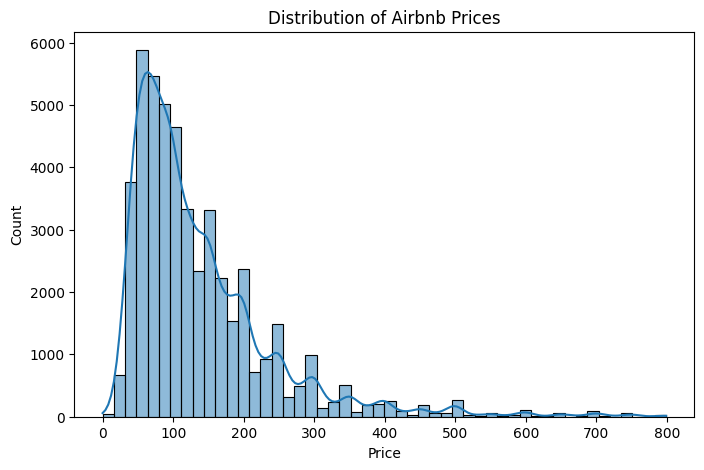

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.show()


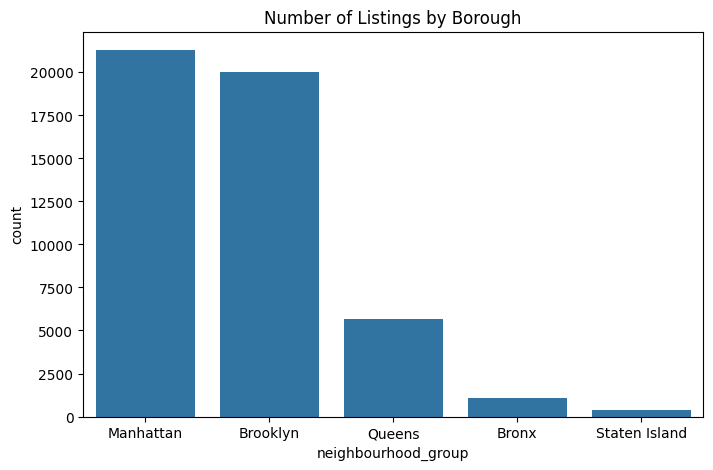

In [14]:

# Listings by borough
plt.figure(figsize=(8,5))
sns.countplot(x="neighbourhood_group", data=df, order=df["neighbourhood_group"].value_counts().index)
plt.title("Number of Listings by Borough")
plt.show()


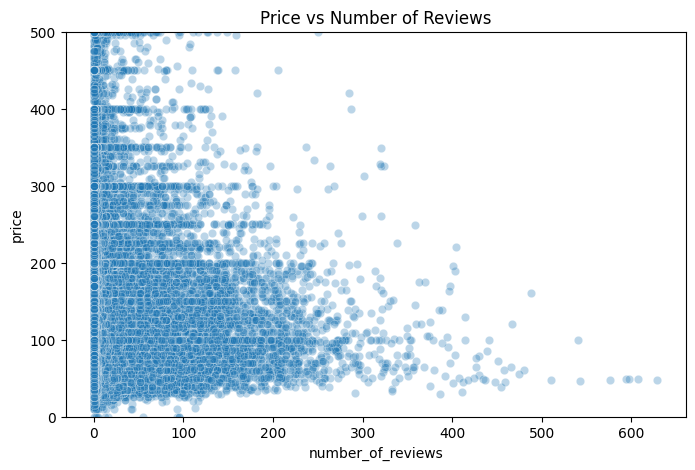

In [15]:

# Scatter plot: price vs number of reviews
plt.figure(figsize=(8,5))
sns.scatterplot(x="number_of_reviews", y="price", alpha=0.3, data=df)
plt.ylim(0,500)
plt.title("Price vs Number of Reviews")
plt.show()


## Step 7: Wrap-Up Activities
Try solving the following challenges:
- Find the **top 10 most expensive listings**.
- Calculate **average price per room type**.
- Visualize **room type distribution per borough**.
- Check if **minimum nights > 365** (likely outliers) and remove them.


In [22]:
# Your code here
top10 = df.nlargest(10, 'price')
top10

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3055,1803165,Huuuge Sunny Central Park REAL 2 bedroom 1.5 b...,9453400,Lo,Manhattan,Midtown,40.76391,-73.97820,Entire home/apt,799,6,40,2018-09-01,0.58,1,365
12844,9793542,Stunning SoHo 1400sqft LOFT/DUPLEX on Best Street,50472471,Allegra,Manhattan,SoHo,40.72090,-74.00229,Entire home/apt,799,3,16,2019-04-28,0.40,1,365
19122,15205915,2BdrmPRESIDENTIAL Luxury CONDO In the Heart of...,96098402,Wynpoints,Manhattan,Midtown,40.75210,-73.97200,Private room,799,4,3,2017-01-13,0.09,12,365
19135,15218066,1Bdrm Deluxe WYNDHAM MIDTOWN 45*Great Location...,96098402,Wynpoints,Manhattan,Midtown,40.75388,-73.97308,Private room,799,3,2,2016-11-05,0.06,12,365
19139,15218699,2Bdrm PRESIDENTIAL CONDO Wyndham Midtown 45 Hotel,96098402,Wynpoints,Manhattan,Midtown,40.75375,-73.97295,Private room,799,4,3,2016-12-28,0.09,12,365
20093,16087249,1 Bdrm Deluxe located in Wyndham Midtown 45 Re...,69545883,Chayla,Manhattan,Midtown,40.75356,-73.97155,Private room,799,3,1,2016-12-06,0.03,12,365
20108,16100032,KG Room Wyndham Midtown 45,69545883,Chayla,Manhattan,Midtown,40.75362,-73.97332,Private room,799,3,1,2016-12-11,0.03,12,365
20185,16159901,1 Bedroom Presidential at Wyndham Midtown 45,69545883,Chayla,Manhattan,Midtown,40.75228,-73.97185,Private room,799,2,1,2016-12-30,0.03,12,365
20459,16310798,Hotel Room King/Queen at Wyndham Midtown 45 Re...,69545883,Chayla,Manhattan,Midtown,40.75198,-73.97266,Private room,799,3,3,2017-09-30,0.10,12,365
25744,20604857,Empire St View Luxury 3BR 2BA Penthouse Balcon...,40042311,Antonya,Manhattan,Murray Hill,40.74699,-73.97770,Entire home/apt,799,5,1,2018-07-28,0.09,1,359


In [17]:
#average price per room type
avg_price = df.groupby("room_type")["price"].mean()
avg_price


,price
room_type,
Entire home/apt,189.083573
Private room,83.376170
Shared room,64.034722


In [18]:
# Check how many such outliers exist
outliers = df[df["minimum_nights"] > 365]
print(f"Outliers found: {len(outliers)}")

# Remove them
df_clean = df[df["minimum_nights"] <= 365].copy()

print(df_clean.shape)

Outliers found: 13
(48371, 16)


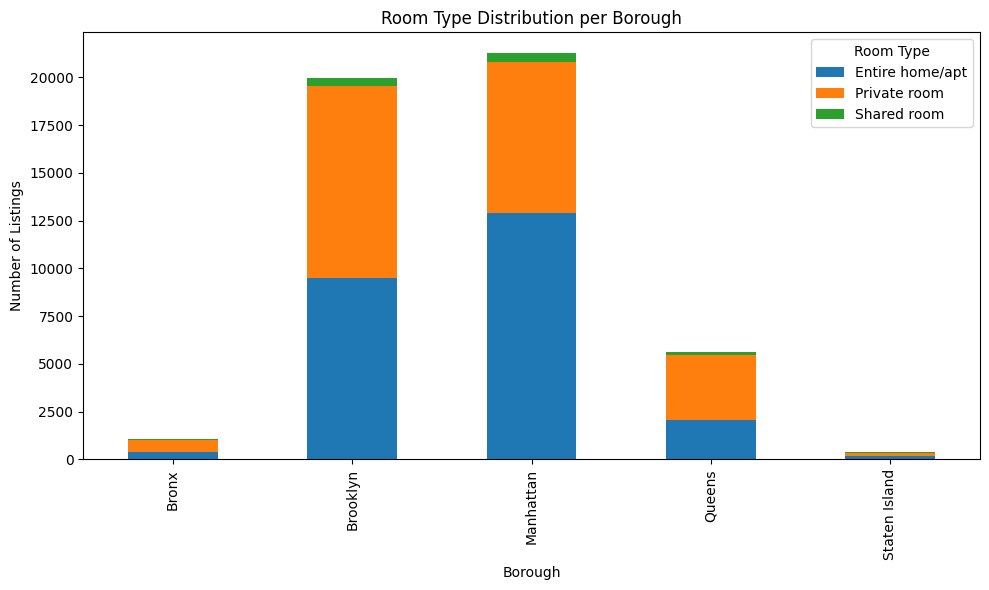

In [21]:
# Count of room types per borough
room_counts = df.groupby(["neighbourhood_group", "room_type"]).size().unstack(fill_value=0)

# Plot as stacked bar chart
room_counts.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Room Type Distribution per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Listings")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()